# Bibliotecas

In [13]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [14]:
# Corrigindo erro com PIL
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Lendo o dataset

In [15]:
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [16]:
def load_data():
    
    datasets = ['../input/face-shape-dataset/FaceShape Dataset/training_set', '../input/face-shape-dataset/FaceShape Dataset/testing_set']
    output = []
    
    # Iteração dos datasets de treino e de testes
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iteração com a pasta de cada categoria
        for folder in os.listdir(dataset):
            if folder != "desktop.ini":

                label = class_names_label[folder]


                # Iteração de cada imagem na pasta
                for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    if file != "desktop.ini":


                        # Get the path name of the image
                        img_path = os.path.join(os.path.join(dataset, folder), file)
                        
                        try:
                            # Leitura e redirecionamento da imagem
                            image = cv2.imread(img_path)
                            if file=="training_set":
                                image = aug.augment_image(image)

                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            image = cv2.resize(image, IMAGE_SIZE) 

                            # Append da image e do seu label correspondente
                            images.append(image)
                            labels.append(label)
                        except Exception as e:
                            print(f"Broken: {img_path}")
                        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [17]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../input/face-shape-dataset/FaceShape Dataset/training_set


 70%|███████   | 561/800 [00:07<00:03, 74.27it/s] 

Broken: ../input/face-shape-dataset/FaceShape Dataset/training_set/Oblong/oblong (724).jpg


100%|██████████| 800/800 [00:11<00:00, 70.44it/s]


Loading ../input/face-shape-dataset/FaceShape Dataset/testing_set


100%|██████████| 200/200 [00:02<00:00, 67.79it/s]


In [18]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# Modelo com CNN usando o Keras

In [19]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0
test_images = test_images / 255.0

Number of training examples: 3999
Number of testing examples: 1000
Each image is of size: (150, 150)


In [20]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(60, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(80, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(100, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(120, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(140, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')

])

tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')

In [21]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [22]:
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
# 조기 종료 콜백 설정
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                            patience=10, 
                                            restore_best_weights=True)

In [24]:
# 모델 훈련
history = model.fit(train_images, train_labels, 
                    epochs=100, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping_cb])
model.save("face.h5")

Epoch 1/100
125/125 [==============================] - 192s 2s/step - loss: 1.6107 - accuracy: 0.2198 - val_loss: 1.6085 - val_accuracy: 0.1990
Epoch 2/100
125/125 [==============================] - 190s 2s/step - loss: 1.6082 - accuracy: 0.2118 - val_loss: 1.6062 - val_accuracy: 0.2660
Epoch 3/100
125/125 [==============================] - 191s 2s/step - loss: 1.5979 - accuracy: 0.2383 - val_loss: 1.5923 - val_accuracy: 0.2610
Epoch 4/100
125/125 [==============================] - 191s 2s/step - loss: 1.5606 - accuracy: 0.2943 - val_loss: 1.5538 - val_accuracy: 0.3020
Epoch 5/100
125/125 [==============================] - 189s 2s/step - loss: 1.5212 - accuracy: 0.3366 - val_loss: 1.5032 - val_accuracy: 0.3430
Epoch 6/100
125/125 [==============================] - 190s 2s/step - loss: 1.4902 - accuracy: 0.3631 - val_loss: 1.4999 - val_accuracy: 0.3510
Epoch 7/100
125/125 [==============================] - 189s 2s/step - loss: 1.4548 - accuracy: 0.3853 - val_loss: 1.5001 - val_accuracy:

In [25]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

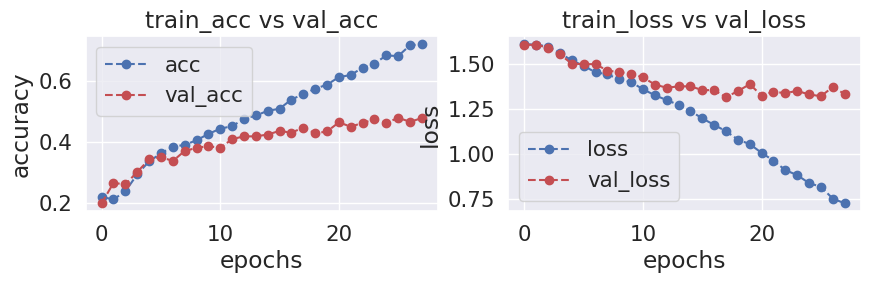

In [26]:
plot_accuracy_loss(history)

In [27]:
test_loss = model.evaluate(test_images, test_labels)

32/32 [==============================] - 12s 365ms/step - loss: 1.3164 - accuracy: 0.4480


# Vizualizando as imagens

In [28]:
def display_random_image(class_names, images, labels):
    """
    #Exibição de uma imagem aleatória
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

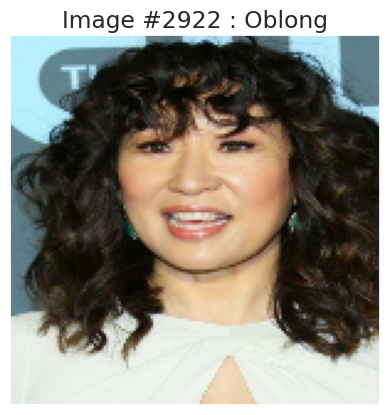

In [29]:
display_random_image(class_names, train_images, train_labels)

In [30]:
def display_examples(class_names, images, labels):
    """
    #Exibição de 25 imagens aleatórias e seus labels correspondentes
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

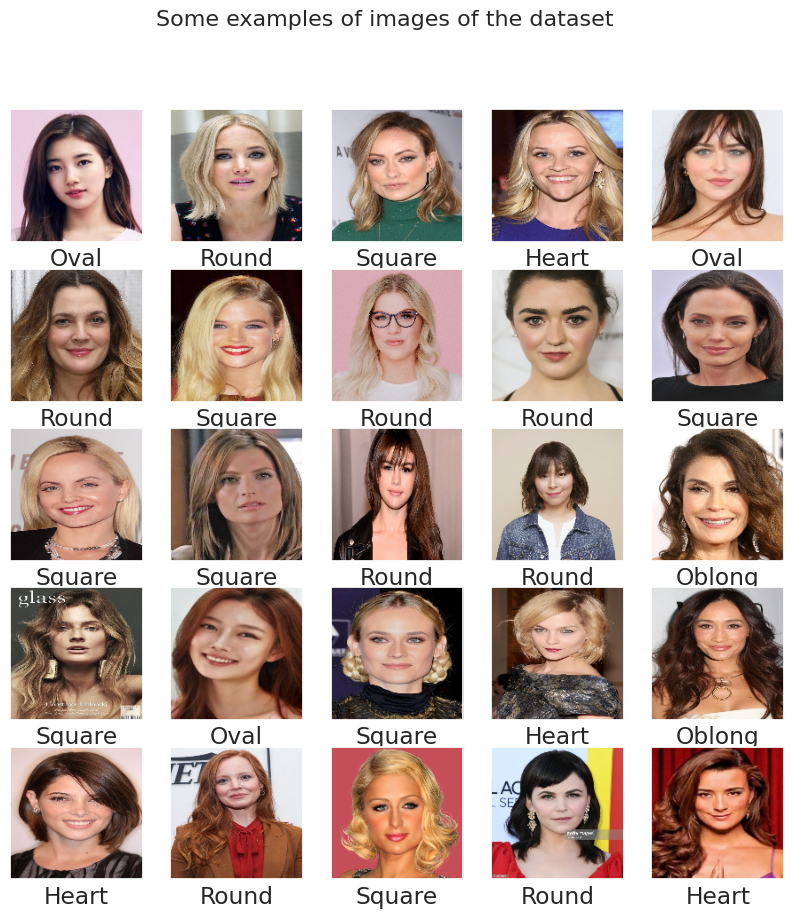

In [31]:
display_examples(class_names, train_images, train_labels)

32/32 [==============================] - 12s 363ms/step


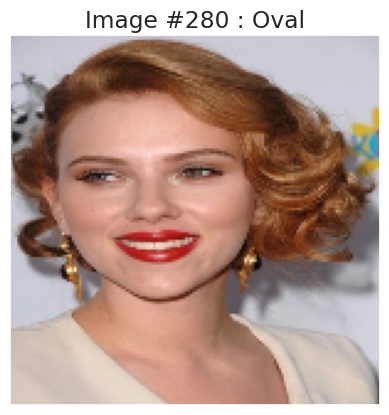

In [32]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [33]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

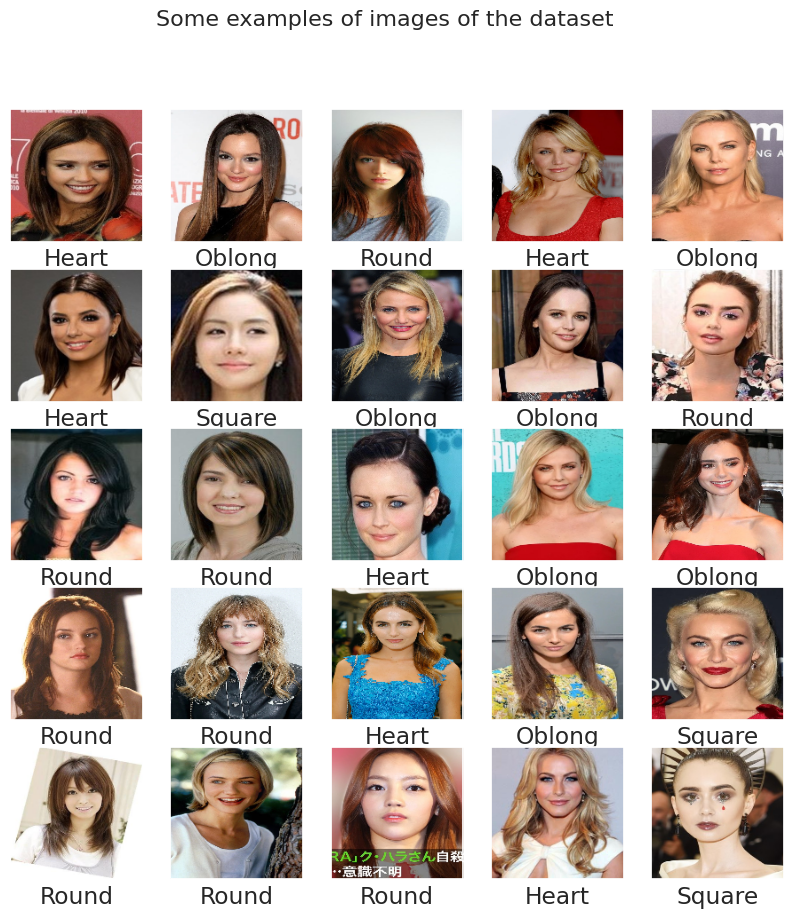

In [34]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

# Matriz de Confusão e Métricas de desempenho

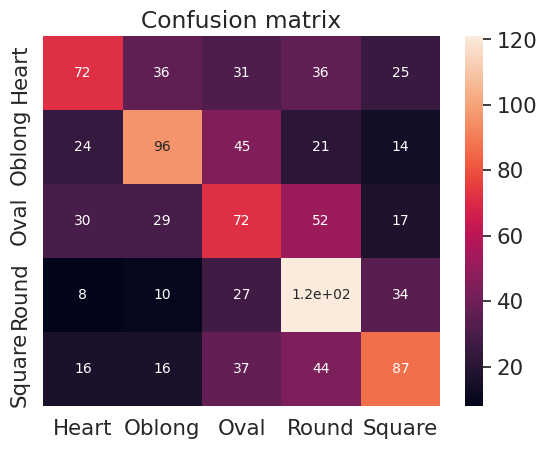

In [35]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [36]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels)
# Recall
from sklearn.metrics import recall_score
recall_score(test_labels, pred_labels, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(test_labels, pred_labels, average=None)

#f1-score
from sklearn.metrics import f1_score
f1_score(test_labels, pred_labels, average=None)

#Classification Report
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_labels, pred_labels, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

       Heart       0.48      0.36      0.41       200
      Oblong       0.51      0.48      0.50       200
        Oval       0.34      0.36      0.35       200
       Round       0.44      0.60      0.51       200
      Square       0.49      0.43      0.46       200

    accuracy                           0.45      1000
   macro avg       0.45      0.45      0.45      1000
weighted avg       0.45      0.45      0.45      1000

